#STOCK PRICE PREDICTION USING TSLA.CSV DATASET

**The models used are:**

1.   Linear Regression
2.   Logistic Regression
3.   SVM
4.   Decision Tree
5.   Naive Bayes
6.   Random Forest
7.   Gradient Boosting
8.   Bagging Regressor





--- Linear Regression ---
MSE: 35.1726
R² Score: 0.9915


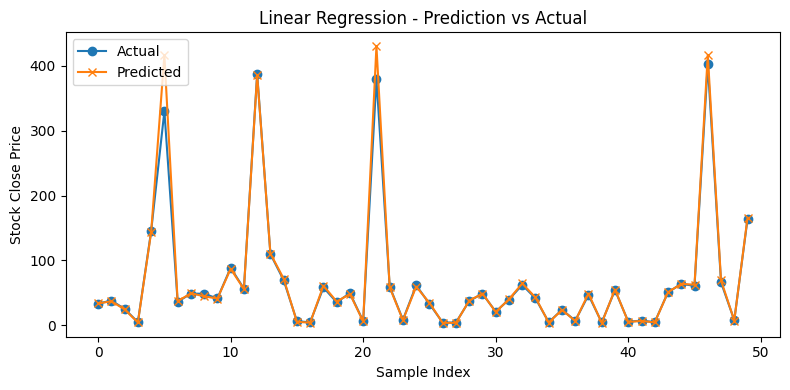


--- Logistic Regression ---
Classification Accuracy (Up/Down): 0.5213

--- SVM ---
MSE: 2246.8998
R² Score: 0.4593


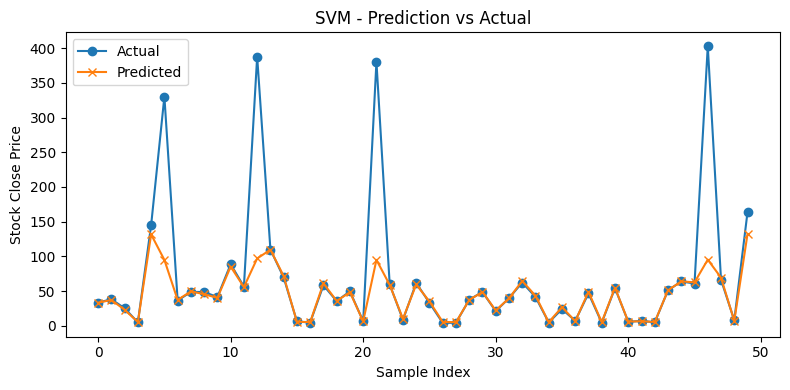


--- Decision Tree ---
MSE: 64.6558
R² Score: 0.9844


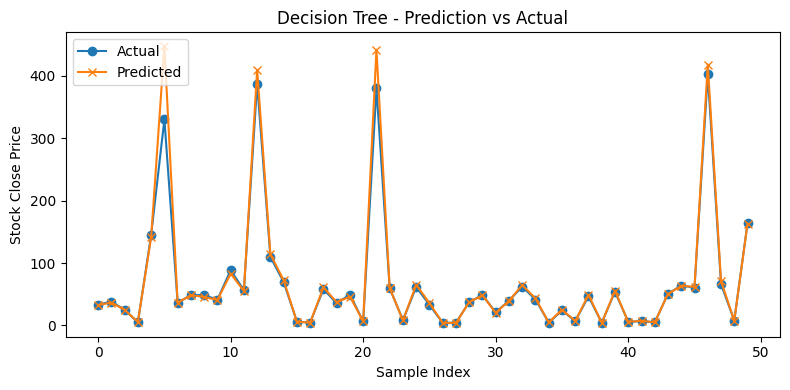


--- Naive Bayes ---
MSE: 3081.1273
R² Score: 0.2585


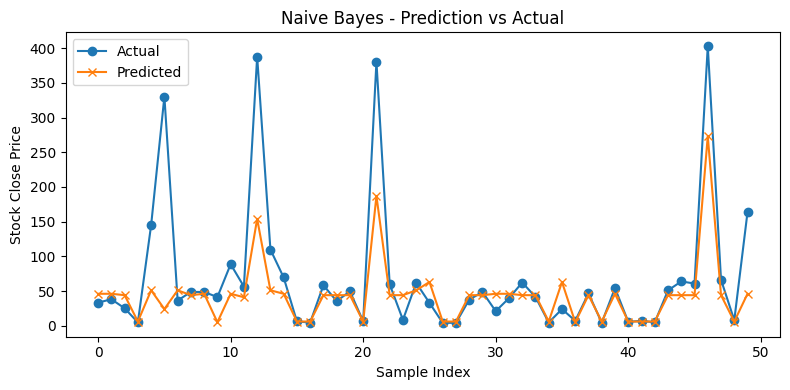


--- Random Forest ---
MSE: 51.3832
R² Score: 0.9876


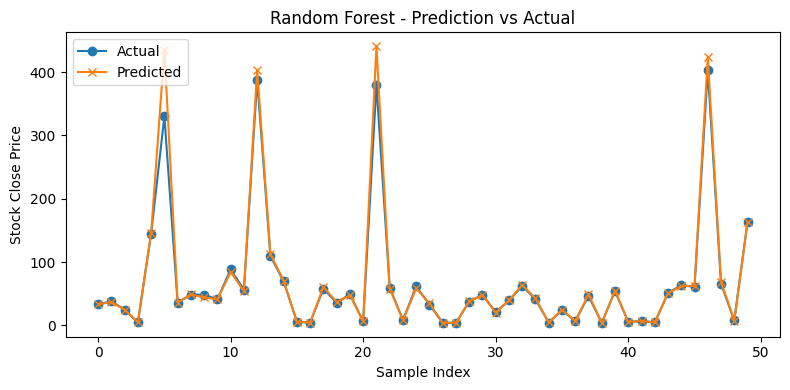


--- Gradient Boosting ---
MSE: 53.5063
R² Score: 0.9871


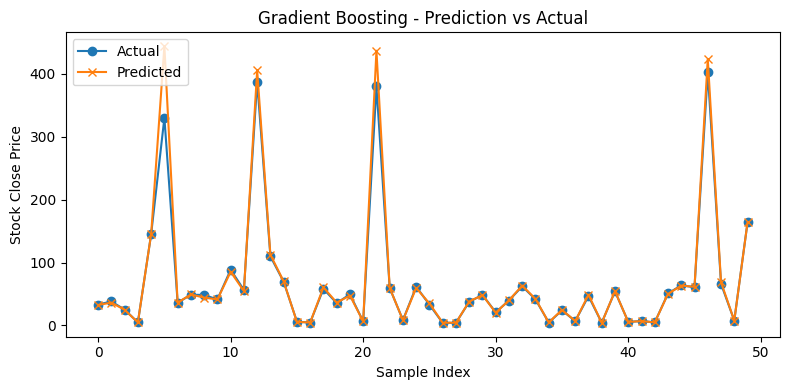


--- Bagging Regressor ---
MSE: 48.7747
R² Score: 0.9883


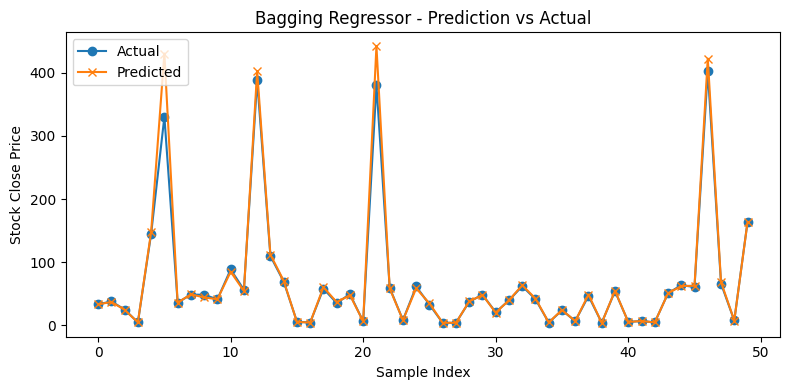

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML_Project/TSLA.csv")
data['Next_Close'] = data['Close'].shift(-1)
data.dropna(inplace=True)

features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
X = data[features]
y = data['Next_Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Bagging Regressor": BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
}

# Train, Predict, Evaluate
for name, model in models.items():
    print(f"\n--- {name} ---")

    if name == "Logistic Regression":
        y_train_bin = (y_train > X_train['Close']).astype(int)
        y_test_bin = (y_test > X_test['Close']).astype(int)
        model.fit(X_train_scaled, y_train_bin)
        predictions = model.predict(X_test_scaled)
        acc = (predictions == y_test_bin).mean()
        print(f"Classification Accuracy (Up/Down): {acc:.4f}")
        continue

    elif name == "Naive Bayes":
        # Rounding to use Naive Bayes for regression
        model.fit(X_train, y_train.round().astype(int))
        predictions = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        predictions = model.predict(X_test_scaled)

    # Metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"MSE: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Plotting
    plt.figure(figsize=(8, 4))
    plt.plot(y_test.values[:50], label='Actual', marker='o')
    plt.plot(predictions[:50], label='Predicted', marker='x')
    plt.title(f"{name} - Prediction vs Actual")
    plt.xlabel('Sample Index')
    plt.ylabel('Stock Close Price')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [9]:
# Create a Results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R2 Score", ascending=False)
print("\n===== Model Performance Summary =====")
print(results_df.to_string(index=False))


===== Model Performance Summary =====
              Model          MSE  R2 Score
  Linear Regression    35.172608  0.991535
  Bagging Regressor    48.774653  0.988262
      Random Forest    51.383191  0.987634
  Gradient Boosting     53.50631  0.987123
      Decision Tree    65.478357  0.984242
Logistic Regression            -  0.521318
                SVM  2246.899754  0.459264
        Naive Bayes  3081.127346  0.258500
